In [1]:
import pandas as pd 
import numpy as npp
import matplotlib.pyplot as plt
import ptitprince as pt
import os
import warnings

# ignore all warnings
warnings.filterwarnings('ignore')

# Combine all Data Files 

In [2]:
#specify the directory containing the csv files
directory_path = './Sales_Data/'  #ensure this is the correct path to your directory

#list all files in the directory
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

#initialize an empty dataframe
all_data = pd.DataFrame()

#iterate over the files and read each csv
for file in files:
    #construct the full file path
    file_path = os.path.join(directory_path, file)
    #read the csv file into a dataframe
    df = pd.read_csv(file_path)
    #concatenate the current dataframe with the aggregated dataframe
    all_data = pd.concat([all_data, df], ignore_index=True)

#display the first few rows of the combined dataframe
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


# Save Concatenated DATA

In [3]:
# all_data.to_csv("./Sales_Data/all_data.csv", index = False)

In [4]:
all_data.info(), all_data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747400 entries, 0 to 747399
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          745220 non-null  object
 1   Product           745220 non-null  object
 2   Quantity Ordered  745220 non-null  object
 3   Price Each        745220 non-null  object
 4   Order Date        745220 non-null  object
 5   Purchase Address  745220 non-null  object
dtypes: object(6)
memory usage: 34.2+ MB


(None,
 Order ID            2180
 Product             2180
 Quantity Ordered    2180
 Price Each          2180
 Order Date          2180
 Purchase Address    2180
 dtype: int64)

In [5]:
# remove rows with any null values
all_data = all_data.dropna()
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
all_data.describe()

Order ID               Product Quantity Ordered Price Each  \
count     745220                745220           745220     745220   
unique    178438                    20               10         24   
top     Order ID  USB-C Charging Cable                1      11.95   
freq        1420                 87612           674208      87612   

        Order Date  Purchase Address  
count       745220            745220  
unique      142396            140788  
top     Order Date  Purchase Address  
freq          1420              1420

In [7]:
boolean = all_data.duplicated().any()
boolean

True

In [8]:
all_data =all_data.drop_duplicates()


# Questions Based Analysis

### Question:1 What was the best month for sales? And how much was earned that month?

So we have to create some augmented columns which will help us to do analysis in a more better way.
Lets Start..

#### Creating month column

In [9]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
# remove rows with non-numeric 'Order Date' entries
all_data = all_data[all_data['Order Date'].str[0:2].str.isnumeric()]
all_data["Month"] = all_data["Order Date"] .str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
# all_data["Month"].head(10)

#### Creating a sales column

As we have `Quantity Ordered` and `Price Each` columns now from these we will create a new column of `Sales`

In [11]:
all_data["Quantity Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [12]:
# all_data["Quantity Ordered"] = all_data["Quantity Ordered"].dropna().astype(int)

In [13]:
all_data= all_data[all_data["Quantity Ordered"] != 'Quantity Ordered']
all_data= all_data[all_data["Quantity Ordered"] != 'nan']
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int")

In [14]:
all_data["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [15]:
all_data["Price Each"] = all_data["Price Each"].astype("float")

In [16]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [17]:
# all_data.sample(10)

Draw plot to answer the question

In [19]:
import plotly.express as px
#group by 'month' and calculate total sales for each month
sales = all_data.groupby("Month").sum(numeric_only=True)

#create a more visually appealing bar chart using plotly
fig = px.bar(
    sales,
    x=sales.index,  #use the month as the x-axis
    y="Sales",      #plot total sales on the y-axis
    labels={"x": "Month", "Sales": "Total Sales"},
    title="Total Sales by Month",
    text="Sales",   #show the sales value on each bar
)

#customize the appearance
fig.update_traces(
    marker_color='rgb(158,202,225)',          #custom color for bars
    marker_line_color='rgb(8,48,107)',        #darker outline for bars
    marker_line_width=1.5,                    #width of the outline
    texttemplate='%{text:,.2f}',              #format the text on bars with commas
    textposition='outside',                   #position text outside the bars
)

#update the layout for better visual appeal
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales (USD)",
    xaxis=dict(
        tickmode='array',
        tickvals=sales.index,
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        tickangle=45,                         #angle the tick labels for better readability
    ),
    yaxis=dict(
        showgrid=True,                        #show grid lines for clarity
        gridcolor='rgba(240,240,240,0.5)',    #light grey grid lines
    ),
    template="plotly_white",                  #use a clean white theme
    plot_bgcolor='rgba(0, 0, 0, 0)',          #transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',         #transparent paper background
    font=dict(size=14, family="Arial"),       #consistent font for readability
    title_font=dict(size=24),                 #larger title font size
)

#enhance hover info
fig.update_traces(hovertemplate='Month: %{x}<br>Total Sales: $%{y:,.2f}<extra></extra>')

#show the figure
fig.show()

###  Question:2 Which City has the highest number of sales?

#### City Column

we no column of cities so first we have to create a city column.

In [20]:
def city(x):
    return x.split(',')[1].strip()

def state(x):
    return x.split(',')[2].split(' ')[1].strip()

# Correctly apply the lambda function to combine city and state
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{city(x)} ({state(x)})")

# Display a sample of 12 rows
# all_data.sample(12)


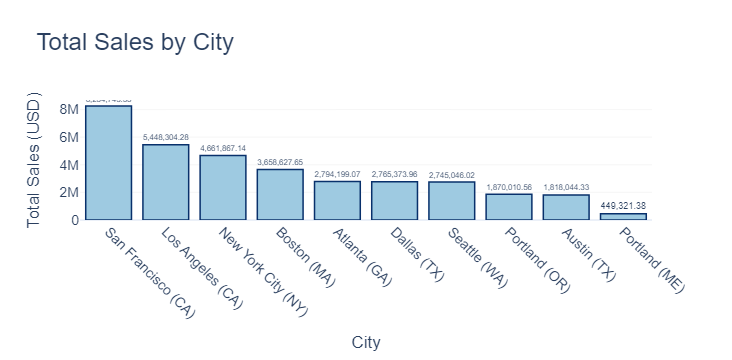

In [27]:
#group data by 'city' and calculate the sum for each city
sales_by_city = all_data.groupby('City').sum(numeric_only=True)

#create a bar chart using plotly
fig = px.bar(
    sales_by_city,
    x=sales_by_city.index,  #use the city as the x-axis
    y='Sales',              #plot total sales on the y-axis
    labels={"x": "City", "Sales": "Total Sales"},
    title="Total Sales by City",
    text='Sales',           #show the sales value on each bar
)

#customize the appearance
fig.update_traces(
    marker_color='rgb(158,202,225)',          #custom color for bars
    marker_line_color='rgb(8,48,107)',        #darker outline for bars
    marker_line_width=1.5,                    #width of the outline
    texttemplate='%{text:,.2f}',              #format the text on bars with commas
    textposition='outside',                   #position text outside the bars
)

#update the layout for better visual appeal
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Total Sales (USD)",
    xaxis=dict(
        tickangle=45,                         #angle the tick labels for better readability
        categoryorder='total descending',     #order categories by total sales descending
    ),
    yaxis=dict(
        showgrid=True,                        #show grid lines for clarity
        gridcolor='rgba(240,240,240,0.5)',    #light grey grid lines
    ),
    template="plotly_white",                  #use a clean white theme
    plot_bgcolor='rgba(0, 0, 0, 0)',          #transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',         #transparent paper background
    font=dict(size=14, family="Arial"),       #consistent font for readability
    title_font=dict(size=24),                 #larger title font size
)

#enhance hover info
fig.update_traces(hovertemplate='City: %{x}<br>Total Sales: $%{y:,.2f}<extra></extra>')

#show the figure
fig.show()


In [28]:
# all_data

### Question:3 At what time should we display advertisements to maximize likelihood of customer's buying product?

In [29]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [30]:
#extract the hour from the 'Order Date' column
all_data['Hour'] = all_data["Order Date"].dt.hour

#display a sample of the data to verify
print(all_data[['Order Date', 'Hour']].sample(10))

                Order Date  Hour
66275  2019-02-26 13:51:00    13
54620  2019-12-29 14:23:00    14
175896 2019-09-07 11:20:00    11
70164  2019-01-11 19:59:00    19
102455 2019-06-03 11:23:00    11
185222 2019-09-07 16:00:00    16
17821  2019-04-27 14:35:00    14
18874  2019-08-18 13:49:00    13
158978 2019-10-03 17:37:00    17
100240 2019-06-13 11:24:00    11


In [31]:
hours = all_data.groupby("Hour")

In [32]:
#group data by 'hour' and calculate the sum for each hour
sales_by_hour = all_data.groupby("Hour").sum(numeric_only=True)

#create a line graph with dots using plotly
fig = px.line(
    sales_by_hour,
    x=sales_by_hour.index,  #use the hour as the x-axis
    y='Sales',              #plot total sales on the y-axis
    labels={"x": "Hour", "Sales": "Total Sales"},
    title="Total Sales by Hour",
    markers=True,           #add markers to the line
)

#customize the appearance
fig.update_traces(
    line=dict(color='rgb(158,202,225)', width=2), #custom color and width for the line
    marker=dict(color='rgb(8,48,107)', size=8),   #custom color and size for the markers
)

#update the layout for better visual appeal
fig.update_layout(
    xaxis_title="Hour of the Day",
    yaxis_title="Total Sales (USD)",
    xaxis=dict(
        tickmode='linear',                    #show every hour as a tick
        tickvals=list(range(24)),             #show ticks for all 24 hours
    ),
    yaxis=dict(
        showgrid=True,                        #show grid lines for clarity
        gridcolor='rgba(240,240,240,0.5)',    #light grey grid lines
    ),
    template="plotly_white",                  #use a clean white theme
    plot_bgcolor='rgba(0, 0, 0, 0)',          #transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',         #transparent paper background
    font=dict(size=14, family="Arial"),       #consistent font for readability
    title_font=dict(size=24),                 #larger title font size
)

#enhance hover info
fig.update_traces(hovertemplate='Hour: %{x}<br>Total Sales: $%{y:,.2f}<extra></extra>')

#show the figure
fig.show()


# At what minute

In [33]:
#extract the hour from the 'Order Date' column
all_data['Minute'] = all_data["Order Date"].dt.minute

#display a sample of the data to verify
print(all_data[['Order Date', 'Minute']].sample(10))

                Order Date  Minute
73863  2019-01-22 17:03:00       3
31237  2019-12-16 11:11:00      11
46974  2019-12-18 12:07:00       7
13370  2019-04-08 11:43:00      43
119957 2019-03-24 12:12:00      12
119438 2019-03-28 17:19:00      19
144832 2019-11-30 15:18:00      18
159831 2019-10-17 18:53:00      53
129534 2019-05-17 20:11:00      11
35125  2019-12-30 13:48:00      48


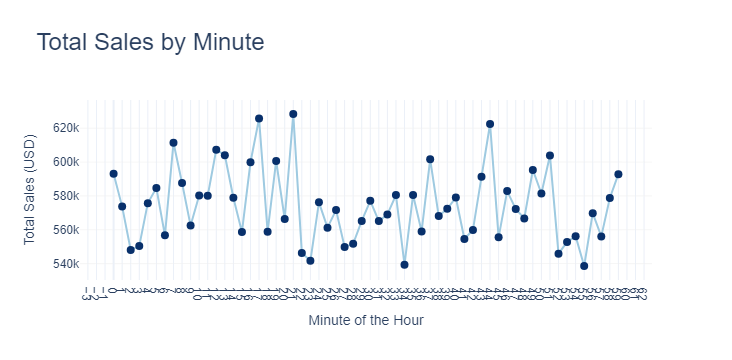

In [34]:
#group data by 'minute' and calculate the sum for each minute
sales_by_minute = all_data.groupby("Minute").sum(numeric_only=True)

#create a line graph with dots using plotly
fig = px.line(
    sales_by_minute,
    x=sales_by_minute.index,  #use the minute as the x-axis
    y='Sales',                #plot total sales on the y-axis
    labels={"x": "Minute", "Sales": "Total Sales"},
    title="Total Sales by Minute",
    markers=True,             #add markers to the line
)

#customize the appearance
fig.update_traces(
    line=dict(color='rgb(158,202,225)', width=2), #custom color and width for the line
    marker=dict(color='rgb(8,48,107)', size=8),   #custom color and size for the markers
)

#update the layout for better visual appeal
fig.update_layout(
    xaxis_title="Minute of the Hour",
    yaxis_title="Total Sales (USD)",
    xaxis=dict(
        tickmode='linear',                    #show every minute as a tick
        tickvals=list(range(60)),             #show ticks for all 60 minutes
    ),
    yaxis=dict(
        showgrid=True,                        #show grid lines for clarity
        gridcolor='rgba(240,240,240,0.5)',    #light grey grid lines
    ),
    template="plotly_white",                  #use a clean white theme
    plot_bgcolor='rgba(0, 0, 0, 0)',          #transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',         #transparent paper background
    font=dict(size=12, family="Arial"),       #consistent font for readability
    title_font=dict(size=24),                 #larger title font size
)

#enhance hover info
fig.update_traces(hovertemplate='Minute: %{x}<br>Total Sales: $%{y:,.2f}<extra></extra>')

#show the figure
fig.show()


### Question:4 What products are more often sold together?

In [35]:
# all_data

First we have to identufy the columns which are responsible to answer this question.
`Order ID` and `Product` columns are going to help me.

In [36]:
all_data.sort_values(by=['Order ID'], inplace=True)
duplicates_data = all_data[all_data['Order ID'].duplicated(keep=False)]

#display the duplicated rows
# duplicates_data

In [37]:
all_data1 = all_data

In [38]:
duplicates_data["Joined"] = duplicates_data.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
# duplicates_data

In [39]:
#drop duplicate rows based on 'Order ID' and 'Joined' columns
unique_duplicates = duplicates_data.drop_duplicates(subset=['Order ID', 'Joined'])

#display the unique duplicate rows
# print(unique_duplicates)

In [40]:
# unique_duplicates.head(20)

In [41]:
from itertools import combinations
from collections import Counter
count  = Counter()
for row in unique_duplicates['Joined']:
    row_split = row.split(",")
    count.update(Counter(combinations(row_split,2)))
# print(count)

In [42]:
#extract the top 6 most common combinations
top_combinations = count.most_common(6)

#convert to dataframe for plotting
comb_df = pd.DataFrame(top_combinations, columns=['Combination', 'Count'])

#create a pie chart using plotly
fig = px.pie(
    comb_df,
    names='Combination',  #use the combination as the name in the pie chart
    values='Count',       #use the count as the value for each slice
    title="Top 6 Most Common Item Combinations",
)

#customize the appearance
fig.update_traces(
    textinfo='percent',                      #show only percentage on the chart
    hovertemplate='Combination: %{label}<br>Frequency: %{value}<extra></extra>', #enhance hover info
    marker=dict(
        colors=px.colors.qualitative.Plotly  #use plotly's qualitative color scheme
    )
)

#update the layout for better visual appeal
fig.update_layout(
    showlegend=True,                         #display legend
    template="plotly_white",                 #use a clean white theme
    font=dict(size=14, family="Arial"),      #consistent font for readability
    title_font=dict(size=24),                #larger title font size
    legend_title_text='Item Combination'     #custom legend title
)

#show the figure
fig.show()


### Question:5 What product sold the most? and What do you think why it being sold most?

In [43]:
import plotly.express as px
import pandas as pd

#group data by 'Product' and calculate total sales for each product
product_sale = all_data.groupby('Product').sum(numeric_only=True)

#create a bar chart using plotly
fig = px.bar(
    product_sale,
    x=product_sale.index,  #use the product names as the x-axis
    y='Sales',             #plot total sales on the y-axis
    labels={"x": "Product", "Sales": "Total Sales"},
    title="Total Sales by Product",
    text='Sales',          #show the sales value on each bar
)

#customize the appearance
fig.update_traces(
    marker_color='rgb(158,202,225)',          #custom color for bars
    marker_line_color='rgb(8,48,107)',        #darker outline for bars
    marker_line_width=1.5,                    #width of the outline
    texttemplate='%{text:,.2f}',              #format the text on bars with commas
    textposition='outside',                   #position text outside the bars
)

#update the layout for better visual appeal
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Total Sales (USD)",
    xaxis=dict(
        tickangle=45,                         #angle the tick labels for better readability
        categoryorder='total descending',     #order categories by total sales descending
    ),
    yaxis=dict(
        showgrid=True,                        #show grid lines for clarity
        gridcolor='rgba(240,240,240,0.5)',    #light grey grid lines
    ),
    template="plotly_white",                  #use a clean white theme
    plot_bgcolor='rgba(0, 0, 0, 0)',          #transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',         #transparent paper background
    font=dict(size=14, family="Arial"),       #consistent font for readability
    title_font=dict(size=24),                 #larger title font size
)

#enhance hover info
fig.update_traces(hovertemplate='Product: %{x}<br>Total Sales: $%{y:,.2f}<extra></extra>')

#show the figure
fig.show()


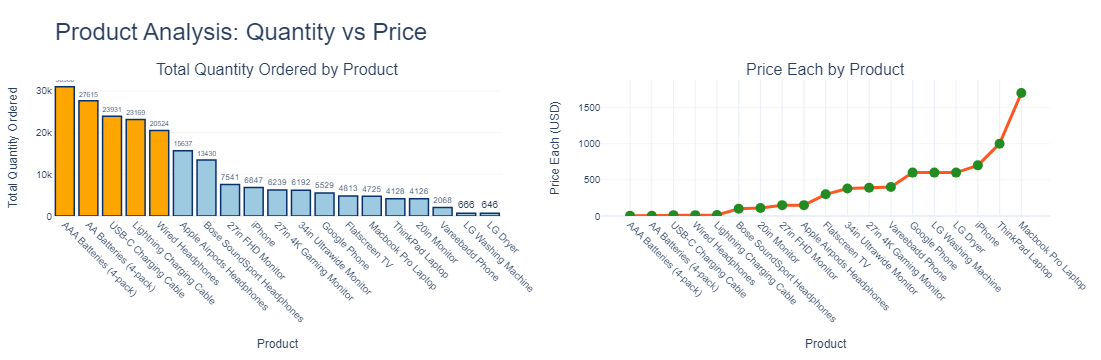

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#group data by 'Product' and calculate total quantity ordered and average price for each product
product_data = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'  #assume 'Price Each' is the unit price
}).reset_index()

#identify top 5 most ordered products
top_5_ordered = product_data.nlargest(5, 'Quantity Ordered')

#identify top 5 products with lowest prices
top_5_lowest_prices = product_data.nsmallest(5, 'Price Each')

#sort product_data by 'Price Each' for the line chart
sorted_product_data = product_data.sort_values(by='Price Each')

#create a subplot with two charts side by side
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Total Quantity Ordered by Product", "Price Each by Product"),
    shared_xaxes=False
)

#add bar chart for quantity ordered
fig.add_trace(
    go.Bar(
        x=product_data['Product'],
        y=product_data['Quantity Ordered'],
        marker=dict(
            color=['rgb(255,165,0)' if product in top_5_ordered['Product'].values else 'rgb(158,202,225)' 
                   for product in product_data['Product']],
            line=dict(color='rgb(8,48,107)', width=1.5)
        ),
        text=product_data['Quantity Ordered'],  #show quantity on bars
        textposition='outside',
        hovertemplate='Product: %{x}<br>Total Quantity Ordered: %{y}<extra></extra>',
        showlegend=False  #hide legend
    ),
    row=1, col=1
)

#add line chart for price each
fig.add_trace(
    go.Scatter(
        x=sorted_product_data['Product'],  #sorted by price
        y=sorted_product_data['Price Each'],
        mode='lines+markers',
        line=dict(color='rgb(255,87,34)', width=3),  #solid line for better aesthetics
        marker=dict(
            size=10,
            symbol='circle',
            color=['rgb(34,139,34)' if product in top_5_lowest_prices['Product'].values else 'rgb(34,139,34,0.3)' 
                   for product in sorted_product_data['Product']]
        ),
        text=sorted_product_data['Price Each'],
        textposition='top center',
        hovertemplate='Product: %{x}<br>Price Each: $%{y:,.2f}<extra></extra>',
        showlegend=False  #hide legend
    ),
    row=1, col=2
)

#update layout for better visual separation and readability
fig.update_layout(
    title='Product Analysis: Quantity vs Price',
    xaxis=dict(
        title='Product',
        tickangle=45,                         #angle tick labels for better readability
        categoryorder='total descending',     #order categories by total quantity descending
        title_font=dict(size=12),             #small font size for x-axis label
    ),
    xaxis2=dict(
        title='Product',
        tickangle=45,                         #angle tick labels for better readability
        title_font=dict(size=12),             #small font size for x-axis label
    ),
    yaxis=dict(
        title='Total Quantity Ordered',
        showgrid=True,
        gridcolor='rgba(240,240,240,0.5)',
        rangemode='tozero',                   #ensure y-axis starts at zero
        title_font=dict(size=12),             #small font size for y-axis label
    ),
    yaxis2=dict(
        title='Price Each (USD)',
        showgrid=True,
        gridcolor='rgba(240,240,240,0.5)',
        rangemode='tozero',                   #ensure y-axis starts at zero
        title_font=dict(size=12),             #small font size for y-axis label
    ),
    template='plotly_white',
    font=dict(size=10, family='Arial'),       #consistent font for readability
    title_font=dict(size=24),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(l=40, r=40, t=80, b=100)
)

#show the figure
fig.show()


### Analysis for Question 5:
* What product sold the most?
The product that sold the most is `AAA Batteries (4-pack)` with `30.986K` units sold.

* Why is it being sold the most?
The top five most ordered products are those with the lowest prices. 
This trend suggests that:

* **Price Sensitivity**: Consumers prefer affordable products, leading to higher sales volumes.
* **Market Demand**: Lower prices increase accessibility and demand.
* **Promotions**: Discounts and promotions might enhance product appeal.